Importing Library

In [56]:
import pandas as pd
import numpy as np
import math

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px

Loading Dataset

In [57]:
maindf=pd.read_csv('output.csv')

In [58]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  2434
Total number of fields present in the dataset:  7


In [59]:
maindf.shape

(2434, 7)

In [60]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,4285.08,795.150377
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,4108.37,1199.888264
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,4139.98,381.309763
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,4086.29,467.083022
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,4016.00,691.743060


In [61]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2429,2024-04-11,70631.08,71305.89,69567.21,70006.23,70006.23,31917.25595
2430,2024-04-12,70006.22,71227.46,65086.86,67116.52,67116.52,56072.86229
2431,2024-04-13,67116.52,67929.00,60660.57,63924.51,63924.51,71395.22019
2432,2024-04-14,63924.52,65840.00,62134.00,65661.84,65661.84,61599.17818
2433,2024-04-15,65661.85,66867.07,62274.40,63419.99,63419.99,52389.53069


In [62]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2434 entries, 0 to 2433
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2434 non-null   object 
 1   Open       2434 non-null   float64
 2   High       2434 non-null   float64
 3   Low        2434 non-null   float64
 4   Close      2434 non-null   float64
 5   Adj Close  2434 non-null   float64
 6   Volume     2434 non-null   float64
dtypes: float64(6), object(1)
memory usage: 133.2+ KB


In [63]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000
mean,22391.522453,22967.099145,21761.879297,22415.887535,22415.887535,72118.377138
std,17246.631881,17689.622273,16755.358668,17262.791396,17262.791396,83087.448815
min,3188.010000,3276.500000,2817.000000,3189.020000,3189.020000,228.108068
25%,8111.670000,8294.882500,7850.000000,8121.180000,8121.180000,29915.083790
50%,16833.920000,17126.895000,16551.115000,16836.380000,16836.380000,46100.888386
75%,34657.255000,35510.665000,33400.855000,34661.130000,34661.130000,76557.983288
max,73072.400000,73777.000000,71333.310000,73072.410000,73072.410000,760705.362783


Checking for Null Values

In [64]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [65]:
print('NA values:',maindf.isnull().values.any())

NA values: False


In [66]:
# Final shape of the dataset after dealing with null values 

maindf.shape

(2434, 7)

EDA(Exploratory Data Analysis)

In [67]:
# Printing the start date and End date of the dataset

sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)


Starting Date 2017-08-17
Ending Date 2024-04-15


/tmp/ipykernel_83727/1507586809.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_83727/1507586809.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Analysis of Year 2018

In [68]:


maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2018 = maindf.loc[(maindf['Date'] >= '2018-01-01')
                     & (maindf['Date'] < '2019-01-01')]

y_2018.drop(y_2018[['Adj Close','Volume']],axis=1)



,Date,Open,High,Low,Close
137,2018-01-01,13715.65,13818.55,12750.00,13380.00
138,2018-01-02,13382.16,15473.49,12890.02,14675.11
139,2018-01-03,14690.00,15307.56,14150.00,14919.51
140,2018-01-04,14919.51,15280.00,13918.04,15059.54
141,2018-01-05,15059.56,17176.24,14600.00,16960.39
...,...,...,...,...,...
497,2018-12-27,3777.74,3813.98,3535.00,3567.91
498,2018-12-28,3567.89,3887.25,3540.04,3839.26
499,2018-12-29,3839.00,3892.00,3670.00,3695.32
500,2018-12-30,3696.71,3903.50,3657.90,3801.91


In [69]:
monthvise= y_2018.groupby(y_2018['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,13003.754516,12890.369032
February,9371.613929,9373.327500
March,9095.151935,8985.636774
April,7944.672333,8022.323333
May,8483.459677,8425.817097
June,6802.949333,6767.169333
July,7080.987419,7124.244839
August,6698.687097,6675.768387
September,6606.005000,6593.360667


In [70]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [71]:
y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2018.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low bitcoin price')
fig.show()

In [72]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2018, x=y_2018.Date, y=[y_2018['Open'], y_2018['Close'], 
                                          y_2018['High'], y_2018['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

Analysis of Year 2019

In [73]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2019 = maindf.loc[(maindf['Date'] >= '2019-01-01')
                     & (maindf['Date'] < '2020-01-01')]

y_2019.drop(y_2019[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
502,2019-01-01,3701.23,3810.16,3642.00,3797.14
503,2019-01-02,3796.45,3882.14,3750.45,3858.56
504,2019-01-03,3857.57,3862.74,3730.00,3766.78
505,2019-01-04,3767.20,3823.64,3703.57,3792.01
506,2019-01-05,3790.09,3840.99,3751.00,3770.96
...,...,...,...,...,...
862,2019-12-27,7202.00,7275.86,7076.42,7254.74
863,2019-12-28,7254.77,7365.01,7238.67,7316.14
864,2019-12-29,7315.36,7528.45,7288.00,7388.24
865,2019-12-30,7388.43,7408.24,7220.00,7246.00


In [74]:
monthvise= y_2019.groupby(y_2019['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,3651.800323,3643.328387
February,3676.562857,3690.157500
March,3931.761290,3940.939355
April,5106.757333,5147.245333
May,7181.538710,7286.034194
June,9329.934333,9406.229667
July,10669.786452,10644.113226
August,10650.832903,10635.182581
September,9820.515333,9777.485667


In [75]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [76]:
y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2019.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low bitcoin price')
fig.show()

In [77]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2019, x=y_2019.Date, y=[y_2019['Open'], y_2019['Close'], 
                                          y_2019['High'], y_2019['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

Analysis of Year 2020

In [78]:


maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2020 = maindf.loc[(maindf['Date'] >= '2020-01-01')
                     & (maindf['Date'] < '2021-01-01')]

y_2020.drop(y_2020[['Adj Close','Volume']],axis=1)



,Date,Open,High,Low,Close
867,2020-01-01,7195.24,7255.0,7175.15,7200.85
868,2020-01-02,7200.77,7212.5,6924.74,6965.71
869,2020-01-03,6965.49,7405.0,6871.04,7344.96
870,2020-01-04,7345.00,7404.0,7272.21,7354.11
871,2020-01-05,7354.19,7495.0,7318.00,7358.75
...,...,...,...,...,...
1228,2020-12-27,26493.40,28422.0,25700.00,26281.66
1229,2020-12-28,26281.54,27500.0,26101.00,27079.41
1230,2020-12-29,27079.42,27410.0,25880.00,27385.00
1231,2020-12-30,27385.00,28996.0,27320.00,28875.54


In [79]:
monthvise= y_2020.groupby(y_2020['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise


,Open,Close
Date,,
January,8308.056129,8377.592581
February,9661.626897,9633.430345
March,6930.625484,6862.995806
April,7138.564667,7212.127000
May,9227.427742,9254.304194
June,9492.229667,9481.804667
July,9521.129677,9592.066129
August,11630.854839,11640.994194
September,10670.695333,10641.700667


In [80]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [81]:
y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2020.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low bitcoin price')
fig.show()

In [82]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2020, x=y_2020.Date, y=[y_2020['Open'], y_2020['Close'], 
                                          y_2020['High'], y_2020['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

Building LSTM Model

First Step is Preparing Data for Training and Testing
Here we are just considering 1 year data for training data
Since Bitcoin price has drastically flucated from 200 dollar in year 2014 to 15000 dollar in year 2018 to 3000 dollar in year 2019(theses values are apporx) so we will just consider 1 Year to avoid this type of flucation in the data.
As we want to predict Close Price of the Bitcoin so we are just Considering Close and Date

In [83]:
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2434, 2)


In [84]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Bitcoin'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2022', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [85]:
closedf = closedf[closedf['Date'] > '2021-02-19']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  1151


In [86]:
closedf

,Date,Close
1283,2021-02-20,55841.19
1284,2021-02-21,57408.57
1285,2021-02-22,54087.67
1286,2021-02-23,48891.00
1287,2021-02-24,49676.20
...,...,...
2429,2024-04-11,70006.23
2430,2024-04-12,67116.52
2431,2024-04-13,63924.51
2432,2024-04-14,65661.84


In [87]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Bitcoin'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


Normalizing Data

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.

MinMaxScaler. For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.

In [88]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(1151, 1)


Slicing data into Training set and Testing set

In [89]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)


train_data:  (690, 1)
test_data:  (461, 1)


Now we Transform the Close price based on Time-series-analysis forecasting requirement , Here we will take 15

In [90]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [91]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (674, 15)
y_train:  (674,)
X_test:  (445, 15)
y_test (445,)


In [92]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (674, 15, 1)
X_test:  (445, 15, 1)


Actuall Model Building

In [93]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

/home/hashen/Downloads/d-h-m-abeysekara-st20267835/backend/venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [94]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.4662 - val_loss: 0.2795
Epoch 2/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2838 - val_loss: 0.1615
Epoch 3/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1712 - val_loss: 0.0753
Epoch 4/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0773 - val_loss: 0.0188
Epoch 5/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0204 - val_loss: 0.0099
Epoch 6/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0123 - val_loss: 0.0073
Epoch 7/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0115 - val_loss: 0.0071
Epoch 8/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0107 - val_loss: 0.0071
Epoch 9/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0106 - val_loss: 0.0070
Epoch 10/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0098 - val_loss: 0.0069
Epoch 11/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0092 - val_loss: 0.0074
Epoch 12/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0091 - val_l

Plotting Loss vs Validation loss

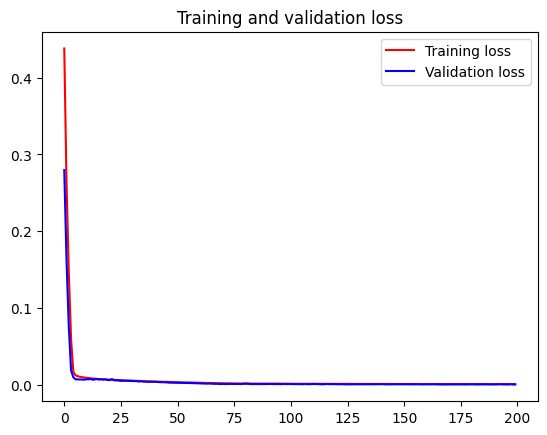

<Figure size 640x480 with 0 Axes>

In [95]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [96]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


((674, 1), (445, 1))

Model Evaluation

In [97]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

Evaluation metrices RMSE, MSE and MAE

In [98]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  1811.0441019077775
Train data MSE:  3279880.7390549486
Train data MAE:  1322.3126922408194
-------------------------------------------------------------------------------------
Test data RMSE:  1386.7144097918995
Test data MSE:  1922976.854324496
Test data MAE:  909.7769359199438


Variance Regression Score

In [99]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9841567588811155
Test data explained variance regression score: 0.9898056050906318


R square score for regression

In [100]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9841202883999886
Test data R2 score: 0.9890564002192858


Comparision of original Bitcoin close price and predicted close price

In [101]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Bitcoin price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


Train predicted data:  (1151, 1)
Test predicted data:  (1151, 1)


Predicting next 30 days

In [102]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


Plotting last 15 days of dataset and next predicted 30 days

In [103]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [104]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Bitcoin price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Plotting entire Closing Bitcoin Price with next 30 days period of prediction

In [105]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Bitcoin price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing bitcoin price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Bitcoin')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()